<a href="https://colab.research.google.com/github/shantanu404/vehicle_controller/blob/main/MPC_error_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-845734671>:44: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross = np.cross(ref_tangent, vector_ref_to_vehicle)


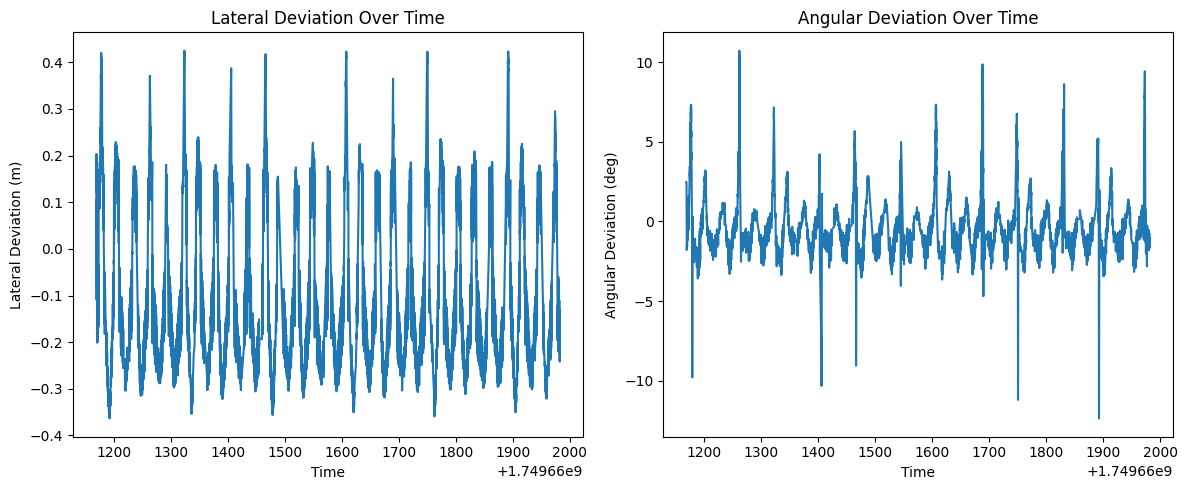

In [5]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/mpcrun.csv')


vehicle_x = df['X'].values
vehicle_y = df['Y'].values
vehicle_yaw = df['Yaw'].values


theta_ref = np.linspace(0, 2 * np.pi, 1000)
r_ref = 50 + 10 * np.sin(2 * theta_ref) + 4 * np.sin(3 * theta_ref) + 6 * np.cos(5 * theta_ref)

x_ref = r_ref * np.cos(theta_ref)
y_ref = -(r_ref * np.sin(theta_ref))


dx = np.gradient(x_ref)
dy = np.gradient(y_ref)
yaw_ref = np.arctan2(dy, dx)


lateral_deviation = []
angular_deviation = []

for x, y, yaw in zip(vehicle_x, vehicle_y, vehicle_yaw):

    dists = np.sqrt((x_ref - x)**2 + (y_ref - y)**2)
    min_idx = np.argmin(dists)


    x_closest = x_ref[min_idx]
    y_closest = y_ref[min_idx]
    yaw_closest = yaw_ref[min_idx]


    lat_dev = np.hypot(x - x_closest, y - y_closest)

    vector_ref_to_vehicle = np.array([x - x_closest, y - y_closest])
    ref_tangent = np.array([np.cos(yaw_closest), np.sin(yaw_closest)])
    cross = np.cross(ref_tangent, vector_ref_to_vehicle)
    lat_dev *= np.sign(cross)


    ang_dev = yaw - yaw_closest

    ang_dev = (ang_dev + np.pi) % (2 * np.pi) - np.pi

    lateral_deviation.append(lat_dev)
    angular_deviation.append(ang_dev)


time = df['Time'].values

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time, lateral_deviation)
plt.xlabel('Time')
plt.ylabel('Lateral Deviation (m)')
plt.title('Lateral Deviation Over Time')

plt.subplot(1, 2, 2)
plt.plot(time, np.degrees(angular_deviation))
plt.xlabel('Time')
plt.ylabel('Angular Deviation (deg)')
plt.title('Angular Deviation Over Time')

plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error


lateral_deviation = np.array(lateral_deviation)
angular_deviation = np.array(angular_deviation)

mse_lateral = mean_squared_error(np.zeros_like(lateral_deviation), lateral_deviation)

mse_angular_rad = mean_squared_error(np.zeros_like(angular_deviation), angular_deviation)

mse_angular_deg = mean_squared_error(np.zeros_like(angular_deviation), np.degrees(angular_deviation))

print(f"Lateral Deviation MSE: {mse_lateral:.4f} m²")
print(f"Angular Deviation MSE: {mse_angular_rad:.6f} rad²")
print(f"Angular Deviation MSE: {mse_angular_deg:.4f} deg²")


Lateral Deviation MSE: 0.0395 m²
Angular Deviation MSE: 0.001190 rad²
Angular Deviation MSE: 3.9065 deg²
